# Exploratory Data Analysis (EDA)

<img src="Google-Play-Store-Apps.jpg" alt="Google Play Store Apps" style="width: 1100px; height: 500px;"/>

## App Ratings Analysis




In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('apps.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### DataFrame Columns and Definitions

- **Unnamed: 0**: Index or identifier for the rows.
- **App**: Name of the application.
- **Category**: Category to which the app belongs.
- **Rating**: Average rating of the app.
- **Reviews**: Number of user reviews for the app.
- **Size**: Size of the app.
- **Installs**: Number of times the app has been installed.
- **Type**: Whether the app is free or paid.
- **Price**: Price of the app (if paid).
- **Content Rating**: Content rating of the app.
- **Genres**: Genre(s) of the app.
- **Last Updated**: Date when the app was last updated.
- **Current Ver**: Current version of the app.
- **Android Ver**: Minimum required Android version for the app.

In [4]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [5]:
df.nunique()

Unnamed: 0        9659
App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Missing Values Analysis

From the output of `df.isnull().sum()`, we can observe the following:

- **Rating**: There are 1463 missing values in the 'Rating' column. This indicates that a significant number of apps do not have a rating associated with them.

- **Size**: There are 1227 missing values in the 'Size' column. This suggests that a considerable number of apps do not have their size specified.

- **Current Ver**: There are 8 missing values in the 'Current Ver' column, indicating that some apps do not have their current version information available.

- **Android Ver**: There are 2 missing values in the 'Android Ver' column, suggesting that a small number of apps do not have their minimum required Android version specified.

**Conclusion:**
1. The missing values in the 'Rating' and 'Size' columns may pose challenges in analyzing app ratings and sizes, respectively. Imputation techniques or careful handling of these missing values may be required depending on the analysis objectives.
2. The missing values in the 'Current Ver' and 'Android Ver' columns are relatively small and may not significantly affect the analysis, but they should still be handled appropriately.
3. Further investigation may be needed to understand the reasons for the missing values and to decide on the most suitable approach for handling them in the analysis.

This analysis highlights the importance of addressing missing values in the dataset to ensure the accuracy and reliability of any subsequent analysis or modeling tasks.
# Handling Large Number of Missing Values

In [7]:
#Let's deal with Rating's NULL values  

# Grouping by 'Category' and calculating the average rating for each category
category_avg_rating = df.groupby('Category')['Rating'].mean()

# Function to fill missing values based on category average rating
def fill_missing_rating(row):
    if pd.isnull(row['Rating']):
        return category_avg_rating[row['Category']]
    else:
        return row['Rating']

# Applying the function to fill missing values in 'Rating' column
df['Rating'] = df.apply(fill_missing_rating, axis=1)

# Confirming no more missing values
print(df.isnull().sum())


Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [8]:
#let's deal with the atteribute size 
# Grouping by 'Category' and calculating the average size for each category
category_avg_size = df.groupby('Category')['Size'].transform('mean')

# Filling missing values in 'Size' column with category average size
df['Size'].fillna(category_avg_size, inplace=True)

# Confirming no more missing values
print(df.isnull().sum())


Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


C:\Users\gyang\AppData\Local\Temp\ipykernel_11456\4048922555.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(category_avg_size, inplace=True)


# Handling Small Number of Missing Values

After successfully dealing with the attributes that contained a large number of null values, let's now address the smaller number of null values in the **Current Ver** and **Android Ver** columns. Since these null values are not present in very large numbers, we can safely drop them.

In [9]:
# Drop rows with missing values in 'Android Ver' column
df.dropna(subset=['Android Ver'], inplace=True)

In [10]:
# Drop rows with missing values in 'Current Ver' column
df.dropna(subset=['Current Ver'], inplace=True)

In [11]:
# now lets check for null values gain and see if somthing is left out 
df.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

"Now that we have successfully addressed and fixed all the null values in our dataset, we can confidently proceed with our analysis and exploration of the data."


In [12]:
# Replace underscores with spaces in the 'Category' column
df['Category'] = df['Category'].str.replace('_', ' ')


C:\Users\gyang\AppData\Local\Temp\ipykernel_11456\3500989047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis', edgecolor='None', linewidth=0)


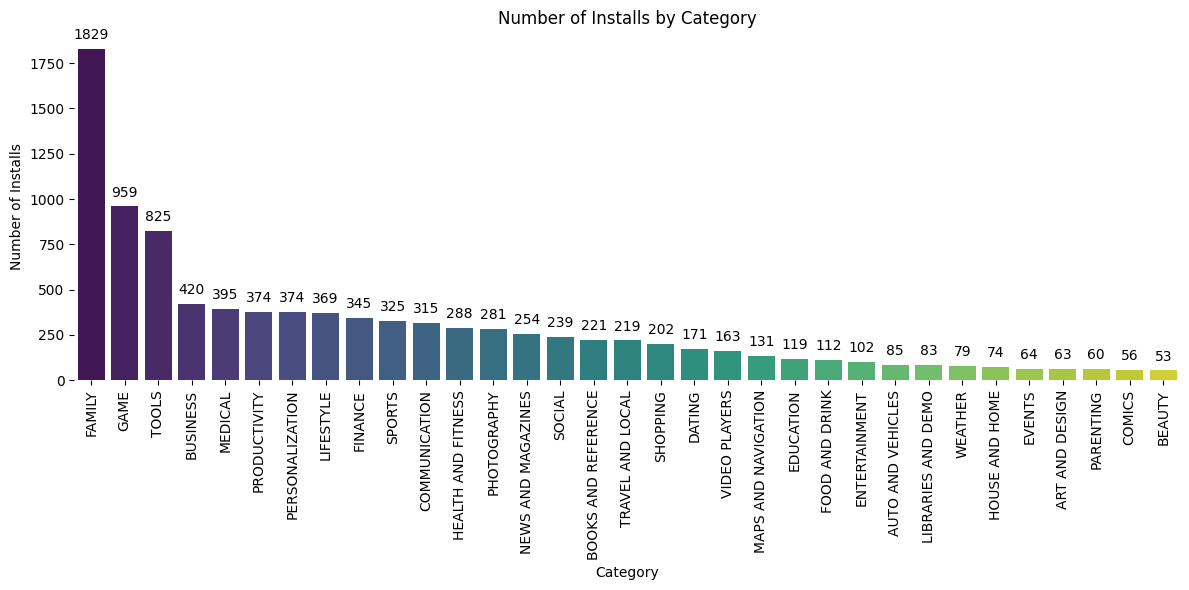

In [13]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting the count of installs in each category without borders
ax = sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis', edgecolor='None', linewidth=0)

# Adding annotations for count of installs on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Number of Installs by Category')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Remove the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show plot
plt.show()


## Number of Installs by Category

### Family Category Dominance:
The **“Family”** category stands out significantly with the highest number of installs. This suggests that family-oriented apps are quite popular among users. These apps may include family organizers, educational tools, parenting guides, and entertainment for all ages.

### Other Categories:
- **Game**: The **“Game”** category follows closely behind with 1829 thousand installs. Gaming apps continue to be a favorite among users.
- **Tools and Business**: The **“Tools”** category (959 thousand installs) and **“Business”** category (825 thousand installs) are also relevant. Users value productivity tools and business-related apps.
- **Niche Categories**: Categories like **“Art and Design”**, **“Beauty”**, and **“Parenting”** have notably lower installs (ranging from 53 to 221 thousand). These niche categories cater to specific interests or needs but have a smaller user base.

### Strategic Insights:
Developers and marketers can leverage this data to create and promote apps that cater to family needs. Additionally, optimizing gaming apps and exploring opportunities in productivity and business-related categories could yield positive results.


In [14]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

C:\Users\gyang\AppData\Local\Temp\ipykernel_11456\1371077304.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Category', y='Rating', palette='viridis')


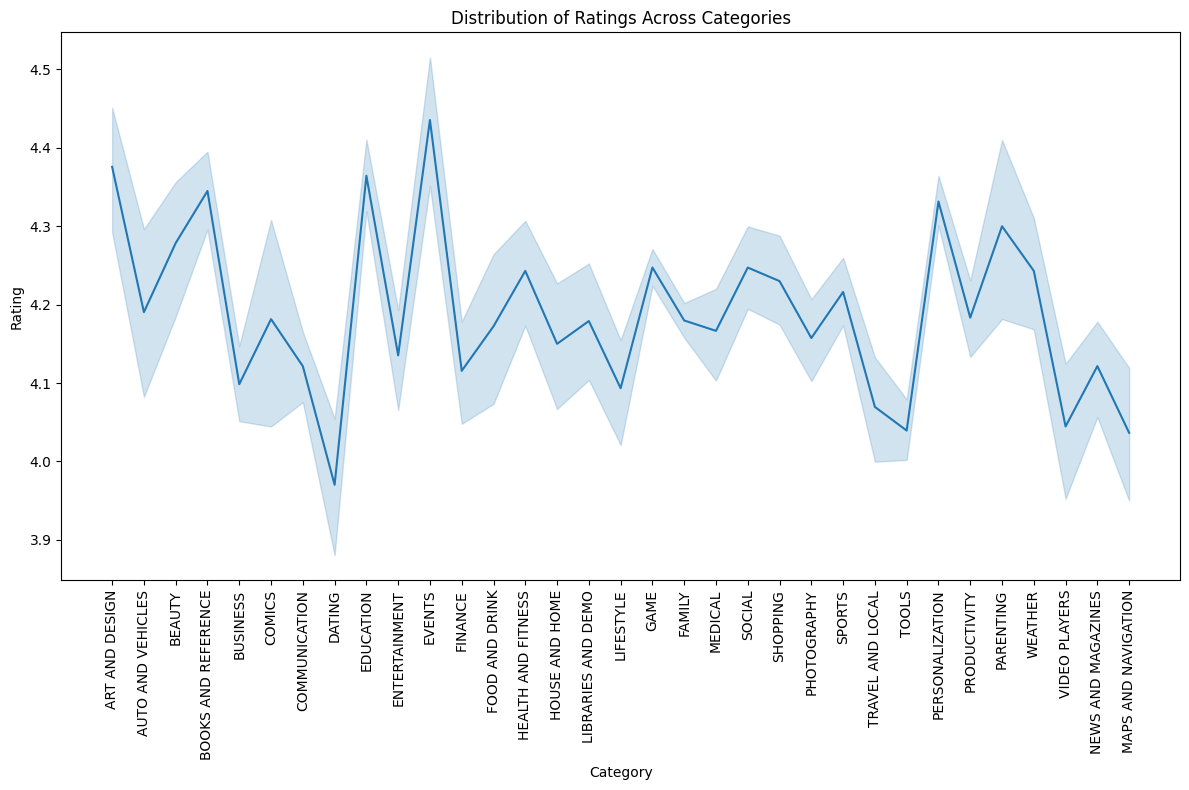

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plotting the distribution of ratings across different categories using a violin plot
sns.lineplot(data=df, x='Category', y='Rating', palette='viridis')

plt.title('Distribution of Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()


## Analysis of Distribution of Ratings Across Categories

### Graph Description:
The graph illustrates the distribution of ratings across various app categories. Each category is represented on the x-axis, and the y-axis represents the rating scale (ranging from approximately 4.0 to 4.5).

### Observations:
- Categories like **AUTO AND VEHICLES** and **WEATHER** receive higher ratings (around 4.5).
- **DATING** has one of the lowest ratings.

### Conclusions:
- Users generally rate apps in the **AUTO AND VEHICLES** and **WEATHER** categories more favorably.
- **DATING** apps need improvement to enhance user satisfaction.


C:\Users\gyang\AppData\Local\Temp\ipykernel_11456\1425854714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='Set2')


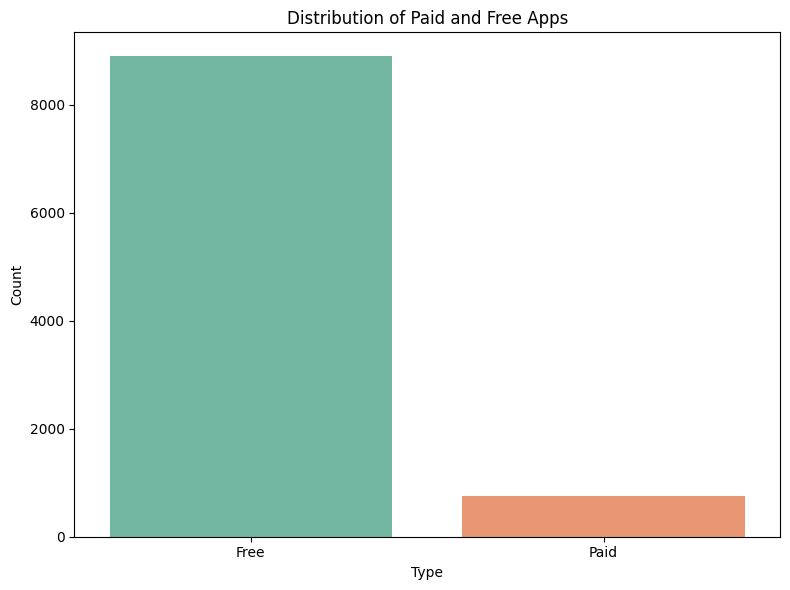

In [16]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Plotting the count of paid and free apps
sns.countplot(data=df, x='Type', palette='Set2')

plt.title('Distribution of Paid and Free Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()

# Show plot
plt.show()


## Analysis of Distribution of Paid and Free Apps

### Graph Description:
The graph illustrates the distribution of free and paid apps. Two bars represent the categories: Free and Paid. The ‘Free’ bar is significantly taller than the ‘Paid’ bar. The y-axis represents the count of apps (ranging from 0 to 8000), and the x-axis indicates the type of apps (Free or Paid). Free apps are represented in teal, while paid apps are in orange.

### Observations:
- There are substantially more free apps available (nearing 8000) compared to paid apps (just above 1000).

### Conclusions:
- The majority of apps are free, indicating a preference for no-cost options.
- Paid apps may cater to specific niches or offer premium features.


In [17]:
df.columns


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

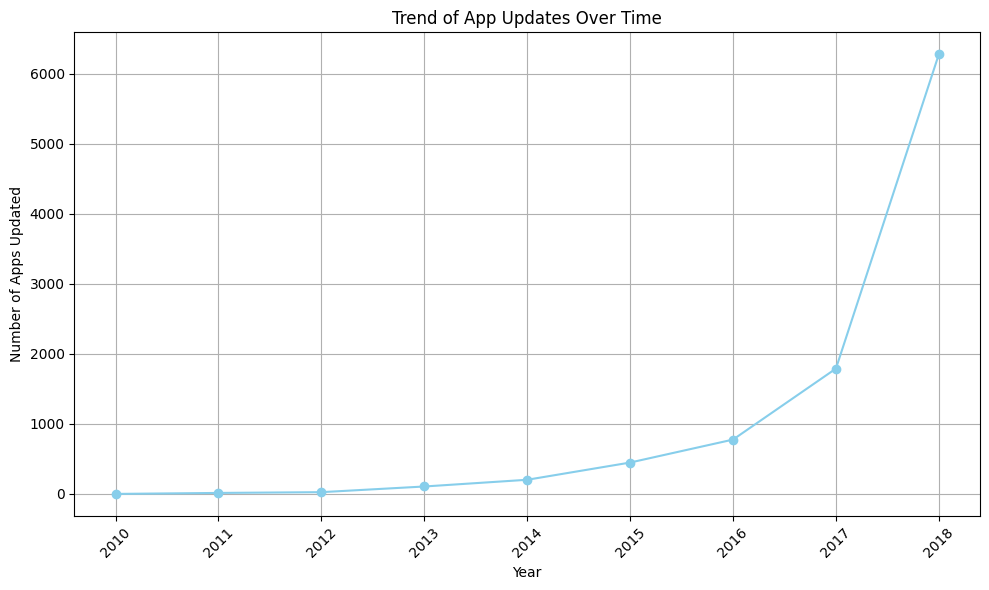

In [20]:
# Convert 'Last Updated' column to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extract the year from 'Last Updated' column
df['Update Year'] = df['Last Updated'].dt.year

# Group by update year and count the number of apps
update_counts = df.groupby('Update Year').size()

# Visualize the trend of app updates over time
plt.figure(figsize=(10, 6))
update_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of App Updates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis of Distribution of App Updates Over Time

### Graph Description:
The graph depicts the trend of app updates from 2010 to 2018. The x-axis represents the years, and the y-axis shows the number of app updates. A blue line with data points represents the trend.

### Observations:
- From 2010 to mid-2016, there is a gradual increase in app updates.
- The most significant surge occurs between mid-2017 and 2018.



## Analysis of Conclusions

### Distribution of Installs by Category
- **Insight**: Family-oriented apps dominate the market, followed by gaming, tools, and business categories.
- **Conclusion**: Developers should focus on creating family-oriented apps and consider opportunities in gaming, productivity tools, and business-related categories.

### Distribution of Paid and Free Apps
- **Insight**: Majority of apps are free, indicating a preference for no-cost options.
- **Conclusion**: Developers should consider offering free apps to cater to user preferences, while paid apps may target specific niches or offer premium features.

### Distribution of Ratings Across Categories
- **Insight**: Auto and Vehicles, and Weather categories receive higher ratings, while Dating apps have lower ratings.
- **Conclusion**: Developers should prioritize quality improvements for Dating apps to enhance user satisfaction, while considering the successful features of Auto and Vehicles, and Weather apps.

### Distribution of App Updates Over Time
- **Insight**: Gradual increase in app updates until mid-2016, with a significant surge from mid-2017 to 2018.
- **Conclusion**: The app ecosystem has experienced substantial growth in recent years, indicating active development and competition among developers.

---

## Insights and Conclusion

- **Market Dynamics**: The Google Play Store exhibits a diverse range of app categories, with family-oriented apps leading the market. Gaming, productivity tools, and business-related apps also hold significant shares.

- **User Preferences**: Users prefer free apps, which constitute the majority of offerings on the platform. This suggests a preference for accessible and cost-effective solutions.

- **Quality and Satisfaction**: App ratings reflect user satisfaction, with certain categories receiving higher ratings than others. Developers should focus on improving the quality of apps in lower-rated categories to enhance user satisfaction.

- **Development Trends**: The trend of app updates over time indicates a dynamic and competitive app market. Developers are actively updating and enhancing their apps to meet evolving user needs and expectations.

In conclusion, the analysis of Google Play Store data reveals a vibrant and dynamic app ecosystem, with opportunities for developers to innovate and cater to user preferences. By understanding market dynamics, prioritizing quality improvements, and staying abreast of development trends, developers can position themselves for success in the competitive app market.
